# importing Libraries

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
#visualization

#Built in dataset
from sklearn.datasets import load_iris


# for hypothesis testing
from scipy.stats import shapiro,normaltest,kstest
import statsmodels.api as sm

# for replace
from sklearn.preprocessing import LabelEncoder , OneHotEncoder


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve


import warnings
warnings.filterwarnings('ignore')
 

# Step 1: problem statement


# Step 2: Data Gathering

In [83]:
df = pd.read_csv(r"D:\Jupyter python\New dataset for pratice numpy and pandas\autos_dataset.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## Step 3 : EDA(Exploratory Data Analysis)

In [84]:
df.shape

(205, 26)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [86]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [87]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

<Axes: xlabel='symboling', ylabel='Density'>

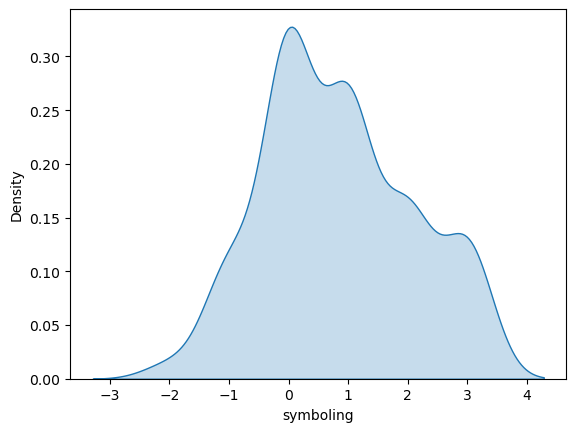

In [88]:
sns.kdeplot(df["symboling"], fill = True)

<Axes: >

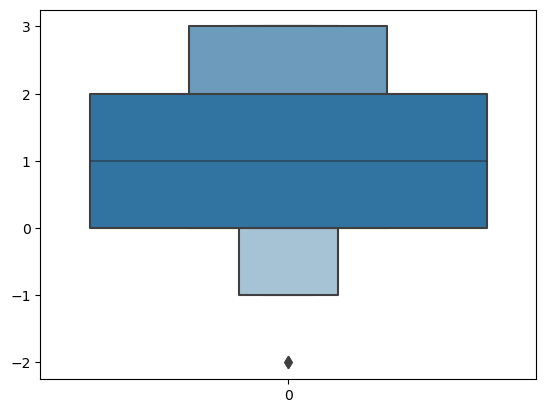

In [89]:
sns.boxenplot(df["symboling"]) # Checking for outlier

In [90]:
df.replace({"?":  np.nan},inplace=True)#Replacing? With null values


In [91]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

## replacing null value

In [92]:
df["price"].replace({np.nan:12949.429268},inplace=True)#Replacing? With null values
df["normalized-losses"].replace({np.nan:122.000000},inplace=True)#Replacing? With null values
df["bore"].replace({np.nan:3.329751},inplace=True)#Replacing? With null values
df["stroke"].replace({np.nan:3.255423},inplace=True)

In [93]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


## step 4 : Feature Engineering

## Checking and replacing outliers

In [94]:
def replace_outliers(df):
    numeric_columns = df.select_dtypes(include=np.number).columns

    for column in numeric_columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        lower_tail = q1 - 1.5 * iqr
        upper_tail = q3 + 1.5 * iqr

        df[column] = np.where(df[column].isna(), np.nan, np.clip(df[column], lower_tail, upper_tail))

# Call the function to replace outliers
replace_outliers(df)


## Converting textual data to numerical

In [95]:
L = LabelEncoder()

In [96]:
df["make"]= L.fit_transform(df["make"])
df["fuel-type"]= L.fit_transform(df["fuel-type"])
df["aspiration"]= L.fit_transform(df["aspiration"])
df["num-of-doors"]= L.fit_transform(df["num-of-doors"])
df["num-of-cylinders "]= L.fit_transform(df["num-of-cylinders"])
df["body-style"]= L.fit_transform(df["body-style"])
df["drive-wheels"]= L.fit_transform(df["drive-wheels"])
df["engine-location"]= L.fit_transform(df["engine-location"])
df["fuel-system"]= L.fit_transform(df["fuel-system"])

In [97]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,num-of-cylinders
0,3.0,122.0,0,1,0,1,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21.0,27.0,13495,2
1,3.0,122.0,0,1,0,1,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21.0,27.0,16500,2
2,1.0,122.0,0,1,0,1,2,2,0,94.5,...,5,2.68,3.47,9.0,154,5000,19.0,26.0,16500,3
3,2.0,164,1,1,0,0,3,1,0,99.8,...,5,3.19,3.4,10.0,102,5500,24.0,30.0,13950,2
4,2.0,164,1,1,0,0,3,0,0,99.4,...,5,3.19,3.4,8.0,115,5500,18.0,22.0,17450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95,21,1,0,0,3,2,0,109.1,...,5,3.78,3.15,9.5,114,5400,23.0,28.0,16845,2
201,-1.0,95,21,1,1,0,3,2,0,109.1,...,5,3.78,3.15,8.7,160,5300,19.0,25.0,19045,2
202,-1.0,95,21,1,0,0,3,2,0,109.1,...,5,3.58,2.87,8.8,134,5500,18.0,23.0,21485,3
203,-1.0,95,21,0,1,0,3,2,0,109.1,...,3,3.01,3.4,10.6,106,4800,26.0,27.0,22470,3


## Converting object column to Int or Float

In [98]:
df["bore"] =  df["bore"].astype("float64")

In [99]:
df["normalized-losses"] =  df["normalized-losses"].astype("float64")

In [100]:
df["stroke"] =  df["stroke"].astype("float64")

In [101]:
df["price"] =  df["price"].astype("int64")

In [102]:
# Define mapping dictionary
engine_type_mapping = {"dohc": 1, "dohcv": 2, "l": 3, "ohc": 4, "ohcf": 5, "ohcv": 6, "rotor": 7}

# Map and convert the column to integers
df["engine-type"] = df["engine-type"].map(engine_type_mapping).astype("int32")


In [103]:
# Define mapping dictionary
cylinder_mapping = {"four": 4, "six": 6, "five": 5, "three": 3, "twelve": 12, "two": 2, "eight": 8}

# Map and convert the column to integers
df["num-of-cylinders"] = df["num-of-cylinders"].map(cylinder_mapping).astype("int32")


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    float64
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    int32  
 3   fuel-type          205 non-null    int32  
 4   aspiration         205 non-null    int32  
 5   num-of-doors       205 non-null    int32  
 6   body-style         205 non-null    int32  
 7   drive-wheels       205 non-null    int32  
 8   engine-location    205 non-null    int32  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    float64
 14  engine-type        205 non-null    int32  
 15  num-of-cylinders   205 non-null    int32  
 16  engine-size        205 non

In [105]:
columns_to_drop = ["horsepower", "peak-rpm"]  # Replace with the actual column names to be dropped
df = df.drop(columns_to_drop, axis=1)


## step 5 : Feature Selection

## Assumption 1.Linearity 

In [106]:
#pearson's coeff of correalation R = -1 to +1
df.corr() #first assumption is proved


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,city-mpg,highway-mpg,price,num-of-cylinders
symboling,1.000000,4.651899e-01,-0.118794,0.194311,-0.059866,0.625944,-0.596135,-0.041671,2.124709e-01,-0.537515,...,-0.113129,-0.100869,0.091163,-0.130083,-0.008689,-0.070206,-0.038222,0.027178,-0.082028,0.197762
normalized-losses,0.465190,1.000000e+00,-0.250975,0.101437,-0.006823,0.357912,-0.250893,0.311032,-2.918301e-17,-0.056826,...,0.108081,0.128249,0.228035,-0.029266,0.054929,-0.095577,-0.221332,-0.186147,0.133997,0.166824
make,-0.118794,-2.509755e-01,1.000000,-0.113191,0.054265,-0.182585,0.089494,-0.004317,5.460831e-02,0.084330,...,-0.125921,-0.040604,0.146624,0.251152,-0.201043,0.158934,0.056777,0.062989,-0.160937,-0.039937
fuel-type,0.194311,1.014370e-01,-0.113191,1.000000,-0.401397,0.129503,-0.147853,-0.132257,4.006951e-02,-0.314415,...,0.024544,-0.107971,0.041529,-0.054457,-0.241820,-0.648473,-0.258696,-0.194567,-0.110417,0.110617
aspiration,-0.059866,-6.822700e-03,0.054265,-0.401397,1.000000,-0.019265,0.063028,0.066465,-5.719146e-02,0.264436,...,-0.047972,0.164998,0.288086,0.212623,0.222970,-0.140192,-0.202875,-0.257215,0.177167,-0.133119
num-of-doors,0.625944,3.579119e-01,-0.182585,0.129503,-0.019265,1.000000,-0.640256,0.078301,1.287648e-01,-0.440686,...,0.005378,-0.042889,0.020715,-0.120738,0.022840,-0.045516,0.039255,0.055499,-0.057547,0.143939
body-style,-0.596135,-2.508926e-01,0.089494,-0.147853,0.063028,-0.640256,1.000000,-0.155745,-2.770093e-01,0.407364,...,-0.041925,-0.074724,-0.065079,0.010562,-0.015344,0.052293,0.033564,-0.001914,-0.072590,-0.048408
drive-wheels,-0.041671,3.110317e-01,-0.004317,-0.132257,0.066465,0.078301,-0.155745,1.000000,1.478645e-01,0.461193,...,0.314006,0.558998,0.424686,0.481805,0.071623,0.127524,-0.451746,-0.459795,0.577238,0.223238
engine-location,0.212471,-2.918301e-17,0.054608,0.040070,-0.057191,0.128765,-0.277009,0.147865,1.000000e+00,-0.191286,...,0.183048,0.249654,0.105971,0.185044,-0.138459,0.070968,-0.154406,-0.103852,0.331088,0.135541
wheel-base,-0.537515,-5.682596e-02,0.084330,-0.314415,0.264436,-0.440686,0.407364,0.461193,-1.912864e-01,1.000000,...,0.324572,0.554028,0.388060,0.489123,0.162259,0.011208,-0.469008,-0.540434,0.572005,-0.169650


<Axes: >

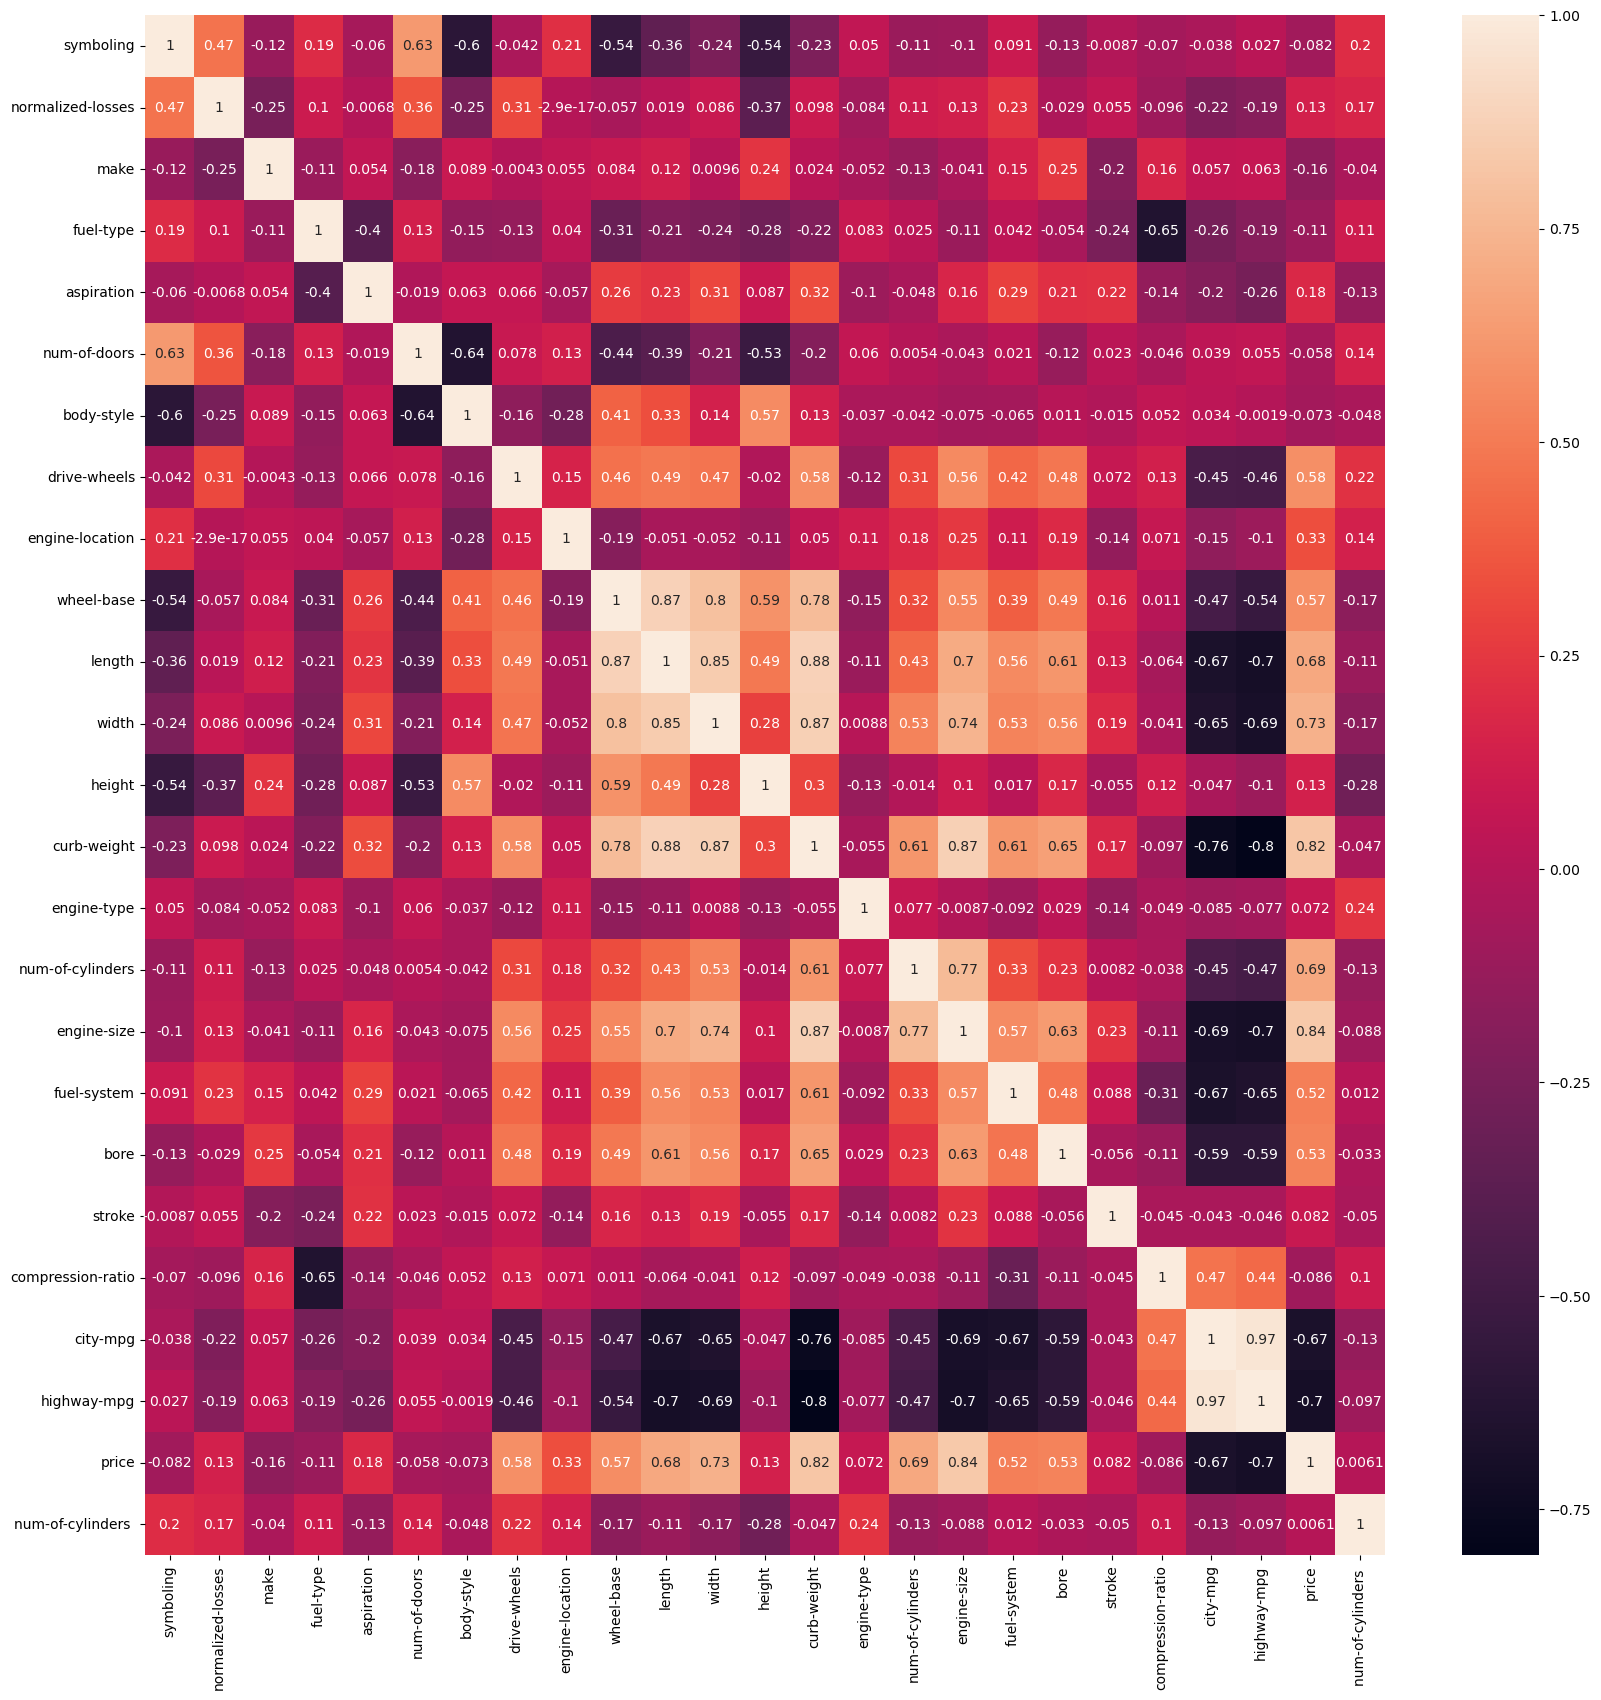

In [107]:
# Another method  to cheque for first assumption It's true or not
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True) #annot: numbers on heatmap
 

## Assumption 2.No multicolinearity

In [108]:
df2 = df.drop(["price"],axis =1) 
df2.head()
df2.shape

(205, 24)

In [109]:
vif = []
for i in range(df2.shape[1]):
    vif_cal = variance_inflation_factor(df2.to_numpy(),i)
    vif.append(vif_cal)
vif

[4.556807289222199,
 28.61673005998131,
 6.99405169484365,
 42.58997966488058,
 2.6932445022290468,
 4.145988859199095,
 27.595064755952222,
 18.79152258333265,
 1.630623260895775,
 2837.9075349184045,
 2271.9394232953323,
 4620.82121973045,
 1175.3793064866675,
 452.54396529173795,
 22.167173390078183,
 101.86463742847987,
 218.94555454256718,
 8.91733272910925,
 513.0744397038599,
 187.03380320907903,
 536.4634136639683,
 359.70977847455794,
 481.8063450529306,
 13.135573845674415]

### train test split

In [110]:
x = df.iloc[:,:]
y = df["price"]
x

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,city-mpg,highway-mpg,price,num-of-cylinders
0,3.0,122.0,0,1,0,1,0,2,0,88.6,...,4,130.0,5,3.47,2.68,9.0,21.0,27.0,13495,2
1,3.0,122.0,0,1,0,1,0,2,0,88.6,...,4,130.0,5,3.47,2.68,9.0,21.0,27.0,16500,2
2,1.0,122.0,0,1,0,1,2,2,0,94.5,...,6,152.0,5,2.68,3.47,9.0,19.0,26.0,16500,3
3,2.0,164.0,1,1,0,0,3,1,0,99.8,...,4,109.0,5,3.19,3.40,10.0,24.0,30.0,13950,2
4,2.0,164.0,1,1,0,0,3,0,0,99.4,...,5,136.0,5,3.19,3.40,8.0,18.0,22.0,17450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95.0,21,1,0,0,3,2,0,109.1,...,4,141.0,5,3.78,3.15,9.5,23.0,28.0,16845,2
201,-1.0,95.0,21,1,1,0,3,2,0,109.1,...,4,141.0,5,3.78,3.15,8.7,19.0,25.0,19045,2
202,-1.0,95.0,21,1,0,0,3,2,0,109.1,...,6,173.0,5,3.58,2.87,8.8,18.0,23.0,21485,3
203,-1.0,95.0,21,0,1,0,3,2,0,109.1,...,6,145.0,3,3.01,3.40,10.6,26.0,27.0,22470,3


In [111]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state = 10) 
#test_size : splitting data into 80%(Training):20%(Testing), random_state: randomly choose 10rows

## Step 6 : model training LinearRegression

In [112]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [113]:
lin_reg_model = lin_reg.fit(xtrain,ytrain)
lin_reg_model

LinearRegression()

### Training data

In [114]:
ytrain_predict = lin_reg_model.predict(xtrain)
ytrain_predict

array([ 7738.,  8249., 34028., 32250.,  6649., 14869., 13860.,  9233.,
       12764.,  9538., 13415., 18920.,  7609., 10945., 28176.,  8845.,
        9980., 22625., 35056.,  9295.,  6229.,  6785.,  6669.,  9960.,
        5572., 37028., 18399.,  7099.,  5118.,  9258., 18950., 25552.,
       18344.,  6377.,  9095., 19045.,  6229.,  9298., 19699., 15690.,
        7975.,  9279., 11199., 10698., 12945.,  9959.,  8499.,  5399.,
       18420., 35550.,  6692.,  6695., 15580., 36880.,  7957.,  6095.,
       24565., 12629., 14489., 11595., 12964., 13950.,  7957., 16515.,
       12290.,  7895., 12940.,  9639., 13845., 12949.,  7463.,  7999.,
        7995.,  6692., 12440., 10345., 11850., 15040.,  7689., 15985.,
       13295.,  9989.,  7775.,  7775., 17669., 20970., 16900., 16925.,
        6989., 18150.,  6488., 17199.,  7129., 13200.,  5195.,  9988.,
        8013., 11694., 17450., 12170., 12949.,  7499., 15750.,  8921.,
       15510., 11259.,  8778.,  8195., 34184.,  5572.,  8358., 21485.,
      

## Assumption 3 : normality of residual

In [115]:
residual_train =  ytrain - ytrain_predict
residual_train

160    1.818989e-12
98     1.818989e-12
127   -7.275958e-12
47    -1.091394e-11
91     3.637979e-12
           ...     
113   -3.637979e-12
64     0.000000e+00
15    -1.091394e-11
125   -7.275958e-12
9      0.000000e+00
Name: price, Length: 164, dtype: float64

### There are some method to check third assumption true or not those are given Below

#### 1. kdeplot : kernel density estimate

<Axes: xlabel='price', ylabel='Density'>

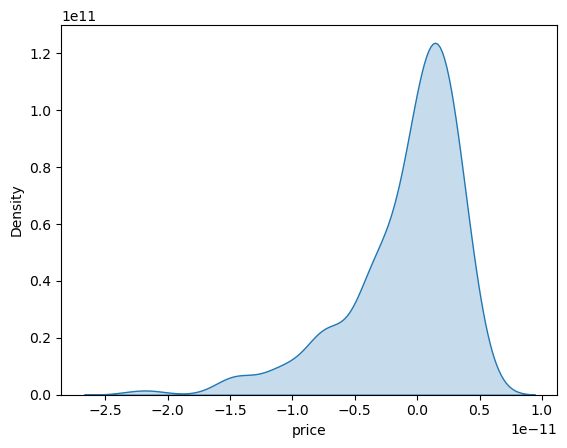

In [116]:
sns.kdeplot(residual_train,fill = True)
# univariate analysis
# If data is normal disturbed then our 3rd Assumption is also true

##### 2. Hypothesis Testing

#### shapiro 

In [117]:
p_val, stats = shapiro(residual_train)

if p_val >= 0.05:
    print(p_val)
    print(stats)
    print("Null hypothesis H0 is True")
    print("Data Is normally distributed")
    
else:
    print("Alternative Hypothesis is True")
    print("Data is not normally distributed")

0.8321441411972046
1.910227401605291e-12
Null hypothesis H0 is True
Data Is normally distributed


#### kstest

In [118]:
p_val, stats = kstest(residual_train ,"norm")
if p_val >= 0.05:
    print(p_val)
    print(stats)
    print("Null hypothesis H0 is True")
    print("Data Is normally distributed")
    
else:
    print("Alternative Hypothesis is True")
    print("Data is not normally distributed")


0.4999999999981858
1.9441133646474465e-38
Null hypothesis H0 is True
Data Is normally distributed


## Assumption 4 : Homoscadasticity

<Axes: ylabel='price'>

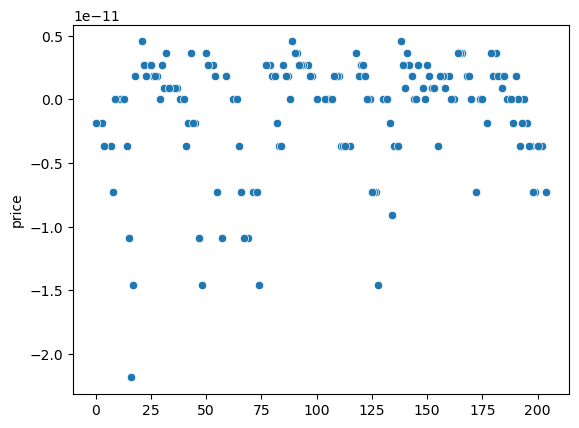

In [119]:
sns.scatterplot(residual_train)

## Step 7 Model Evaluation

### For training data

In [120]:
print(40*"*","Model Evaluation on training data",40*"*")
mse = mean_squared_error(ytrain,ytrain_predict)
print("Mean squared Error = ",mse)
print(50*"_")
print(50*"*")
mae = mean_absolute_error(ytrain,ytrain_predict)
print("Mean absolute Error = ",mae)
print(50*"_")
print(50*"*")
rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print(50*"_")
print(50*"*")
R2score = r2_score(ytrain,ytrain_predict)
print("R2 score = ",R2score)
print(50*"_")
print(50*"*")

**************************************** Model Evaluation on training data ****************************************
Mean squared Error =  2.1234331578342967e-23
__________________________________________________
**************************************************
Mean absolute Error =  3.1166830633925955e-12
__________________________________________________
**************************************************
Root Mean squared Error =  4.6080724363168344e-12
__________________________________________________
**************************************************
R2 score =  1.0
__________________________________________________
**************************************************


## For testing data

In [121]:
ytest_predict = lin_reg_model.predict(xtest)

In [122]:
print(40*"*","Model Evaluation on testing data",40*"*")
mse = mean_squared_error(ytest,ytest_predict)
print("Mean squared Error = ",mse)
print(50*"_")
print(50*"*")
mae = mean_absolute_error(ytest,ytest_predict)
print("Mean absolute Error = ",mae)
print(50*"_")
print(50*"*")
rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print(50*"_")
print(50*"*")
R2score = r2_score(ytest,ytest_predict)
print("R2 score = ",R2score)
print(50*"_")
print(50*"*")

**************************************** Model Evaluation on testing data ****************************************
Mean squared Error =  2.4169813996061637e-23
__________________________________________________
**************************************************
Mean absolute Error =  3.1943228550073577e-12
__________________________________________________
**************************************************
Root Mean squared Error =  4.916280504208607e-12
__________________________________________________
**************************************************
R2 score =  1.0
__________________________________________________
**************************************************


## Step 6 : Model Training DecisionTreeRegressor

#### Model training

In [123]:
dec_tree = DecisionTreeRegressor()
dec_tree_model = dec_tree.fit(xtrain,ytrain)
dec_tree_model

DecisionTreeRegressor()

### Training

In [124]:
ytrain_pred = dec_tree_model.predict(xtrain)
ytrain_pred

array([ 7738.,  8249., 34028., 32250.,  6649., 14869., 13860.,  9233.,
       12764.,  9538., 13415., 18920.,  7609., 10945., 28176.,  8845.,
        9980., 22625., 35056.,  9295.,  6229.,  6785.,  6669.,  9960.,
        5572., 37028., 18399.,  7099.,  5118.,  9258., 18950., 25552.,
       18344.,  6377.,  9095., 19045.,  6229.,  9298., 19699., 15690.,
        7975.,  9279., 11199., 10698., 12945.,  9959.,  8499.,  5399.,
       18420., 35550.,  6692.,  6695., 15580., 36880.,  7957.,  6095.,
       24565., 12629., 14489., 11595., 12964., 13950.,  7957., 16515.,
       12290.,  7895., 12940.,  9639., 13845., 12949.,  7463.,  7999.,
        7995.,  6692., 12440., 10345., 11850., 15040.,  7689., 15985.,
       13295.,  9989.,  7775.,  7775., 17669., 20970., 16900., 16925.,
        6989., 18150.,  6488., 17199.,  7129., 13200.,  5195.,  9988.,
        8013., 11694., 17450., 12170., 12949.,  7499., 15750.,  8921.,
       15510., 11259.,  8778.,  8195., 34184.,  5572.,  8358., 21485.,
      

In [125]:
mse = mean_squared_error(ytrain,ytrain_predict)
print("Mean squared Error = ",mse)
mae = mean_absolute_error(ytrain,ytrain_predict)
print("Mean absolute Error = ",mae)
rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
r2score = r2_score(ytrain,ytrain_predict)
print("R2 score = ",r2score)

Mean squared Error =  2.1234331578342967e-23
Mean absolute Error =  3.1166830633925955e-12
Root Mean squared Error =  4.6080724363168344e-12
R2 score =  1.0


### Testing

In [126]:
ytest_pred = dec_tree_model.predict(xtest)
ytest_pred

array([ 9959., 18150., 10945., 11694., 35550.,  8495.,  6338., 11199.,
        8013., 21105., 15040.,  8921.,  7898., 16900., 12945., 13415.,
       10945., 18150., 16695., 17199.,  7295., 16630.,  8495., 17199.,
       18150., 16515.,  8921.,  6529.,  8845., 14489.,  7738.,  7738.,
        6849., 15580., 25552., 25552., 10945., 13415.,  9995.,  5499.,
       10945.])

In [127]:
mse = mean_squared_error(ytest,ytest_predict)
print("Mean squared Error = ",mse)
print()
mae = mean_absolute_error(ytest,ytest_predict)
print("Mean absolute Error = ",mae)
print()
rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print()
r2score = r2_score(ytest,ytest_predict)
print("R2 score = ",r2score)
print()

Mean squared Error =  2.4169813996061637e-23

Mean absolute Error =  3.1943228550073577e-12

Root Mean squared Error =  4.916280504208607e-12

R2 score =  1.0



## Hyperparameter Tunning

In [128]:
hyperparameters = {
    "criterion" : ["squared_error","absolute_error"],
    "max_depth" : np.arange(2,10),
    "min_samples_split" : np.arange(2,20),
    "min_samples_leaf" : np.arange(2,20),
} 

In [129]:
Randomsearch = RandomizedSearchCV(dec_tree_model,hyperparameters,cv=5)
Randomsearch

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [130]:
Randomsearch.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [131]:
Randomsearch.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=8,
                      min_samples_leaf=9, min_samples_split=3)

In [132]:
hyper_model =DecisionTreeRegressor(criterion='squared_error',max_depth=7, min_samples_leaf=5)

In [133]:
hyper_model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=5)

### Training

In [134]:
ytrain_pred_hyper = hyper_model.predict(xtrain)
ytrain_pred_hyper

array([ 7732.33333333,  8245.8       , 33479.42857143, 33479.42857143,
        6562.8       , 14067.55555556, 14067.55555556,  9239.83333333,
       12851.        ,  9503.8       , 14067.55555556, 19046.8       ,
        7732.33333333, 11169.85714286, 23374.55555556,  8716.71428571,
       10084.        , 23374.55555556, 33479.42857143,  9239.83333333,
        6242.83333333,  6761.33333333,  6562.8       , 10084.        ,
        5356.75      , 40316.6       , 18210.33333333,  7056.25      ,
        5356.75      ,  9239.83333333, 19046.8       , 23374.55555556,
       18210.33333333,  6242.83333333,  9239.83333333, 19046.8       ,
        6242.83333333,  9503.8       , 19046.8       , 15752.16666667,
        7982.66666667,  9239.83333333, 11169.85714286, 11169.85714286,
       13065.8       , 10084.        ,  8716.71428571,  5356.75      ,
       18210.33333333, 33479.42857143,  6761.33333333,  6761.33333333,
       15752.16666667, 40316.6       ,  7982.66666667,  6242.83333333,
      

In [135]:
mse = mean_squared_error(ytrain,ytrain_pred_hyper)
print("Mean squared Error = ",mse)
mae = mean_absolute_error(ytrain,ytrain_pred_hyper)
print("Mean absolute Error = ",mae)
rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
r2score = r2_score(ytrain,ytrain_pred_hyper)
print("R2 score = ",r2score)


Mean squared Error =  734952.2846714092
Mean absolute Error =  380.2636662795199
Root Mean squared Error =  857.2935813777035
R2 score =  0.9888634297602482


### Testing

In [136]:
ytest_pred_hyper = hyper_model.predict(xtest)
ytest_pred_hyper

array([10084.        , 18210.33333333, 11169.85714286, 12057.33333333,
       33479.42857143,  8716.71428571,  6242.83333333, 11169.85714286,
        7982.66666667, 23374.55555556, 14067.55555556,  8716.71428571,
        7732.33333333, 16894.875     , 13065.8       , 14067.55555556,
       11169.85714286, 18210.33333333, 16894.875     , 16894.875     ,
        7383.33333333, 16894.875     ,  8716.71428571, 16894.875     ,
       18210.33333333, 16894.875     ,  8716.71428571,  6562.8       ,
        8716.71428571, 14067.55555556,  7732.33333333,  7732.33333333,
        6761.33333333, 15752.16666667, 23374.55555556, 23374.55555556,
       11169.85714286, 14067.55555556, 10084.        ,  5356.75      ,
       11169.85714286])

In [137]:
mse = mean_squared_error(ytest,ytest_pred_hyper)
print("Mean squared Error = ",mse)
print()
mae = mean_absolute_error(ytest,ytest_pred_hyper)
print("Mean absolute Error = ",mae)
print()
rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print()
r2score = r2_score(ytest,ytest_pred_hyper)
print("R2 score = ",r2score)
print()

Mean squared Error =  2512300.03685991

Mean absolute Error =  641.0883662408052

Root Mean squared Error =  1585.0236707569732

R2 score =  0.9429420611680548



# Creating Pickle File

In [138]:
with open('Autos.pkl','wb') as f:
    pickle.dump(hyper_model,f)

In [139]:
class Prediction():
    def Autos_data(self,testing_data):
        with open("Autos.pkl","rb") as f:
            model = pickle.load(f)
            prediction = model.predict(testing_data)
            print("Prediction =",prediction)
        return (prediction)


predict = Prediction ()
testing_data = x.head(10)
predict.Autos_data(testing_data)


Prediction = [14067.55555556 16894.875      16894.875      14067.55555556
 16894.875      14067.55555556 18210.33333333 19046.8
 23374.55555556 13065.8       ]


array([14067.55555556, 16894.875     , 16894.875     , 14067.55555556,
       16894.875     , 14067.55555556, 18210.33333333, 19046.8       ,
       23374.55555556, 13065.8       ])